<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/UAS_DML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOAL NOMOR 1**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import math

dataset = pd.read_csv("https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/CarPrice_Assignment.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# Harga Mobil (price) dan Besaran mesin (enginesize)

data_selection = dataset[['price','enginesize']]
data_rename_column = data_selection.rename(columns={
'price':'price',
'enginesize':'enginesize',
})
data_rename_column.head()
print(data_rename_column)

       price  enginesize
0    13495.0         130
1    16500.0         130
2    16500.0         152
3    13950.0         109
4    17450.0         136
..       ...         ...
200  16845.0         141
201  19045.0         141
202  21485.0         173
203  22470.0         145
204  22625.0         141

[205 rows x 2 columns]


In [3]:
print("#jumlah dataset:"+str(len(data_rename_column.index)))
data_rename_column.describe()

#jumlah dataset:205


,price,enginesize
count,205.000000,205.000000
mean,13276.710571,126.907317
std,7988.852332,41.642693
min,5118.000000,61.000000
25%,7788.000000,97.000000
50%,10295.000000,120.000000
75%,16503.000000,141.000000
max,45400.000000,326.000000


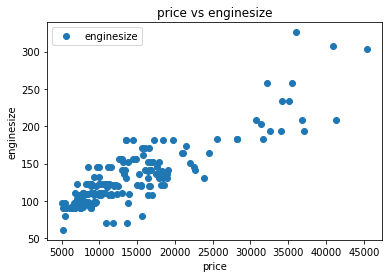

In [4]:
data_rename_column.plot(x='price', y='enginesize', style='o')
plt.title('price vs enginesize')
plt.xlabel('price')
plt.ylabel('enginesize')
plt.show()

In [5]:
x = data_rename_column.iloc[:, :-1].values
y = data_rename_column.iloc[:, -1].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,91,97.285014
1,161,138.580967
2,136,136.275219
3,61,89.703714
4,109,112.041804
5,146,117.594046
6,92,90.801250
7,92,102.371495
8,181,145.263026
9,92,96.058356


In [6]:
y_pred_train = regressor.predict(x_train)
dataframe = pd.DataFrame({'Data Sebenarnya': y_train, 'Data Prediksi': y_pred_train})
dataframe

,Data Sebenarnya,Data Prediksi
0,136,146.420511
1,234,223.589297
2,121,135.306804
3,108,117.870735
4,98,101.038772
...,...,...
159,183,183.782857
160,97,129.796066
161,134,149.648559
162,258,214.670662


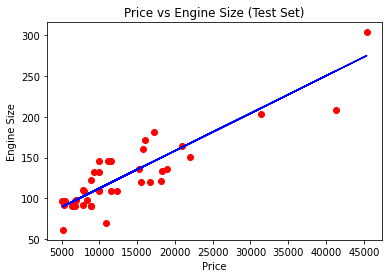

In [7]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, regressor.predict(x_test), color='blue')
plt.title('Price vs Engine Size (Test Set)')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

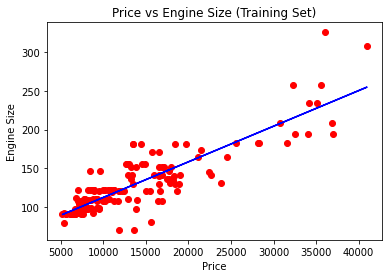

In [10]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Price vs Engine Size (Training Set)')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

In [9]:
regressor.fit(x_train, y_train)

# Menampilkan nilai coef & intercept
print('Coeficient: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

Coeficient:  [0.0046115]
Intercept:  65.94989417992784


# **SOAL NOMOR 2**

In [11]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/CarPrice_Assignment.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
data_selection = dataset[['price', 'enginesize']]
data_rename_column = data_selection.rename(columns={
'price':'price',
'enginesize':'enginesize',
})
data_rename_column.head()
print(data_rename_column)

       price  enginesize
0    13495.0         130
1    16500.0         130
2    16500.0         152
3    13950.0         109
4    17450.0         136
..       ...         ...
200  16845.0         141
201  19045.0         141
202  21485.0         173
203  22470.0         145
204  22625.0         141

[205 rows x 2 columns]


In [14]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/CarPrice_Assignment.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# Harga Mobil (price) dan Besaran mesin (enginesize)

data_selection = dataset[['price','enginesize']]
data_rename_column = data_selection.rename(columns={
'price':'price',
'enginesize':'enginesize',
})
data_rename_column.head()
print(data_rename_column)

       price  enginesize
0    13495.0         130
1    16500.0         130
2    16500.0         152
3    13950.0         109
4    17450.0         136
..       ...         ...
200  16845.0         141
201  19045.0         141
202  21485.0         173
203  22470.0         145
204  22625.0         141

[205 rows x 2 columns]


In [21]:
X = data_rename_column.iloc[:, :-1].values
print(X)

[[13495.   ]
 [16500.   ]
 [16500.   ]
 [13950.   ]
 [17450.   ]
 [15250.   ]
 [17710.   ]
 [18920.   ]
 [23875.   ]
 [17859.167]
 [16430.   ]
 [16925.   ]
 [20970.   ]
 [21105.   ]
 [24565.   ]
 [30760.   ]
 [41315.   ]
 [36880.   ]
 [ 5151.   ]
 [ 6295.   ]
 [ 6575.   ]
 [ 5572.   ]
 [ 6377.   ]
 [ 7957.   ]
 [ 6229.   ]
 [ 6692.   ]
 [ 7609.   ]
 [ 8558.   ]
 [ 8921.   ]
 [12964.   ]
 [ 6479.   ]
 [ 6855.   ]
 [ 5399.   ]
 [ 6529.   ]
 [ 7129.   ]
 [ 7295.   ]
 [ 7295.   ]
 [ 7895.   ]
 [ 9095.   ]
 [ 8845.   ]
 [10295.   ]
 [12945.   ]
 [10345.   ]
 [ 6785.   ]
 [ 8916.5  ]
 [ 8916.5  ]
 [11048.   ]
 [32250.   ]
 [35550.   ]
 [36000.   ]
 [ 5195.   ]
 [ 6095.   ]
 [ 6795.   ]
 [ 6695.   ]
 [ 7395.   ]
 [10945.   ]
 [11845.   ]
 [13645.   ]
 [15645.   ]
 [ 8845.   ]
 [ 8495.   ]
 [10595.   ]
 [10245.   ]
 [10795.   ]
 [11245.   ]
 [18280.   ]
 [18344.   ]
 [25552.   ]
 [28248.   ]
 [28176.   ]
 [31600.   ]
 [34184.   ]
 [35056.   ]
 [40960.   ]
 [45400.   ]
 [16503.   ]
 [ 5389.   ]

In [20]:
Y = data_rename_column.iloc[:, -1].values
print(Y)

[130 130 152 109 136 136 136 136 131 131 108 108 164 164 164 209 209 209
  61  90  90  90  90  98  90  90  90  98 122 156  92  92  79  92  92  92
  92 110 110 110 110 110 110 111  90  90 119 258 258 326  91  91  91  91
  91  70  70  70  80 122 122 122 122 122 122 140 134 183 183 183 183 234
 234 308 304 140  92  92  92  98 110 122 156 156 156 122 122 110 110  97
 103  97  97  97  97  97  97  97  97 120 120 181 181 181 181 181 181 120
 152 120 152 120 152 120 152 120 152 134  90  98  90  90  98 122 156 151
 194 194 194 203 132 132 121 121 121 121 121 121  97 108 108 108 108 108
 108 108 108 108 108 108  92  92  92  92  92  92  98  98 110 110  98  98
  98  98  98  98  98 146 146 146 146 146 146 122 110 122 122 122 171 171
 171 161  97 109  97 109 109  97 109 109 109 136  97 109 141 141 141 141
 130 130 141 141 173 145 141]


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['enginesize']= label_encoder.fit_transform(dataset['enginesize']) 
dataset['enginesize'].unique()
label_encoder_y = LabelEncoder()
Y= label_encoder_y.fit_transform(Y)
Y

array([18, 18, 28, 11, 22, 22, 22, 22, 19, 19, 10, 10, 31, 31, 31, 38, 38,
       38,  0,  4,  4,  4,  4,  8,  4,  4,  4,  8, 17, 29,  6,  6,  2,  6,
        6,  6,  6, 12, 12, 12, 12, 12, 12, 13,  4,  4, 14, 40, 40, 43,  5,
        5,  5,  5,  5,  1,  1,  1,  3, 17, 17, 17, 17, 17, 17, 23, 21, 35,
       35, 35, 35, 39, 39, 42, 41, 23,  6,  6,  6,  8, 12, 17, 29, 29, 29,
       17, 17, 12, 12,  7,  9,  7,  7,  7,  7,  7,  7,  7,  7, 15, 15, 34,
       34, 34, 34, 34, 34, 15, 28, 15, 28, 15, 28, 15, 28, 15, 28, 21,  4,
        8,  4,  4,  8, 17, 29, 27, 36, 36, 36, 37, 20, 20, 16, 16, 16, 16,
       16, 16,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  6,  6,  6,
        6,  6,  6,  8,  8, 12, 12,  8,  8,  8,  8,  8,  8,  8, 26, 26, 26,
       26, 26, 26, 17, 12, 17, 17, 17, 32, 32, 32, 30,  7, 11,  7, 11, 11,
        7, 11, 11, 11, 22,  7, 11, 24, 24, 24, 24, 18, 18, 24, 24, 33, 25,
       24])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=21)

#input data train pada fungsi klasifikasi
classifier.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=21)

In [39]:
# Menentukan hasil prediksi dari X_test
y_pred=classifier.predict(X_test)
y_pred

array([ 6, 28, 24,  4, 12, 17,  4,  7, 28,  6, 24, 35, 17, 24,  8, 12, 17,
       28,  7,  6, 12, 28, 12, 17, 28,  4,  6, 28, 17,  4,  7, 17, 24, 17,
        6, 35, 17, 24,  4, 35,  8, 24, 35, 24, 17,  7,  7, 24, 12, 17, 35,
        6,  8, 12, 28, 24, 17, 24, 12,  4,  6, 28])

In [40]:
# Menentukan probabilitas dari hasil prediksi
classifier.predict_proba(X_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04761905, 0.        , 0.04761905, ..., 0.        , 0.        ,
        0.        ],
       [0.04761905, 0.        , 0.04761905, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04761905, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04761905, 0.        , 0.04761905, ..., 0.        , 0.        ,
        0.        ]])

In [41]:
from sklearn.metrics import  classification_report,confusion_matrix

# hasil dari confussion matrix.
print(confusion_matrix(Y_test,y_pred))

# hasil ketepatan nilai precision , recall
print(classification_report(Y_test, y_pred))

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           4       0.33      0.40      0.36         5
           5       0.00      0.00      0.00         1
           6       0.43      0.60      0.50         5
           7       0.00      0.00      0.00         3
           8       0.33      0.25      0.29         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.14      0.50      0.22         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.18      0.67      0.29         3
          18       0.00      0.00      0.00         1
          19   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [42]:
# Menampilkan nilai accuracy
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%.')

Accuracy of our model is equal 14.52%.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear

<Figure size 432x288 with 0 Axes>

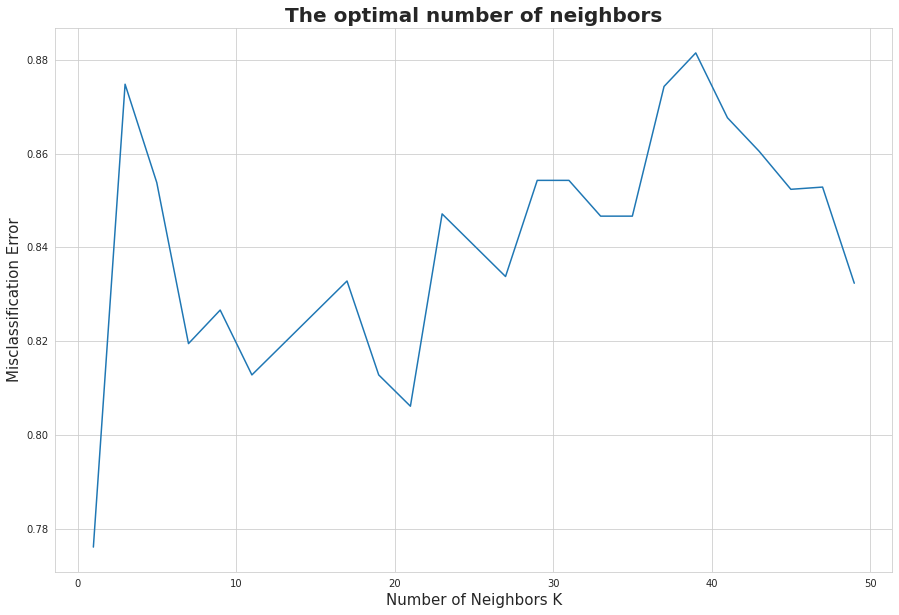

The optimal number of neighbors is 1.


In [43]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
#membuat list of K for KNN
k_list = list(range(1,50,2))
cv_scores = []

# melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)